In [52]:
import importlib

import numpy as np
import random
import time
import pandas as pd
import os
import random
from tqdm import tqdm


# Signals
from scipy.stats import mannwhitneyu
from scipy import signal
from scipy.fft import fftshift
from scipy.signal import welch

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)  


from matplotlib.colors import Normalize, LogNorm

import auxlib; importlib.reload(auxlib)

<module 'auxlib' from 'c:\\Users\\Usuario\\Desktop\\tandil\\auxlib.py'>

In [53]:
signals, signal_headers, header = auxlib.loadEEG(subject=1, record=3)

In [54]:
header['annotations']

[[0.0, 4.2, 'T0'],
 [4.2, 4.1, 'T2'],
 [8.3, 4.2, 'T0'],
 [12.5, 4.1, 'T1'],
 [16.6, 4.2, 'T0'],
 [20.8, 4.1, 'T1'],
 [24.9, 4.2, 'T0'],
 [29.1, 4.1, 'T2'],
 [33.2, 4.2, 'T0'],
 [37.4, 4.1, 'T2'],
 [41.5, 4.2, 'T0'],
 [45.7, 4.1, 'T1'],
 [49.8, 4.2, 'T0'],
 [54.0, 4.1, 'T1'],
 [58.1, 4.2, 'T0'],
 [62.3, 4.1, 'T2'],
 [66.4, 4.2, 'T0'],
 [70.6, 4.1, 'T1'],
 [74.7, 4.2, 'T0'],
 [78.9, 4.1, 'T2'],
 [83.0, 4.2, 'T0'],
 [87.2, 4.1, 'T2'],
 [91.3, 4.2, 'T0'],
 [95.5, 4.1, 'T1'],
 [99.6, 4.2, 'T0'],
 [103.8, 4.1, 'T1'],
 [107.9, 4.2, 'T0'],
 [112.1, 4.1, 'T2'],
 [116.2, 4.2, 'T0'],
 [120.4, 4.1, 'T1']]

In [55]:
subject, data, per_run, labels, channels = auxlib.GetSignal(1, 'RL', sample_rate=160, segment_length=1040, selected_channels=None)

In [56]:
len(data)

23

In [85]:
data[0].shape

(64, 1040)

In [57]:
per_run

[8, 8, 7]

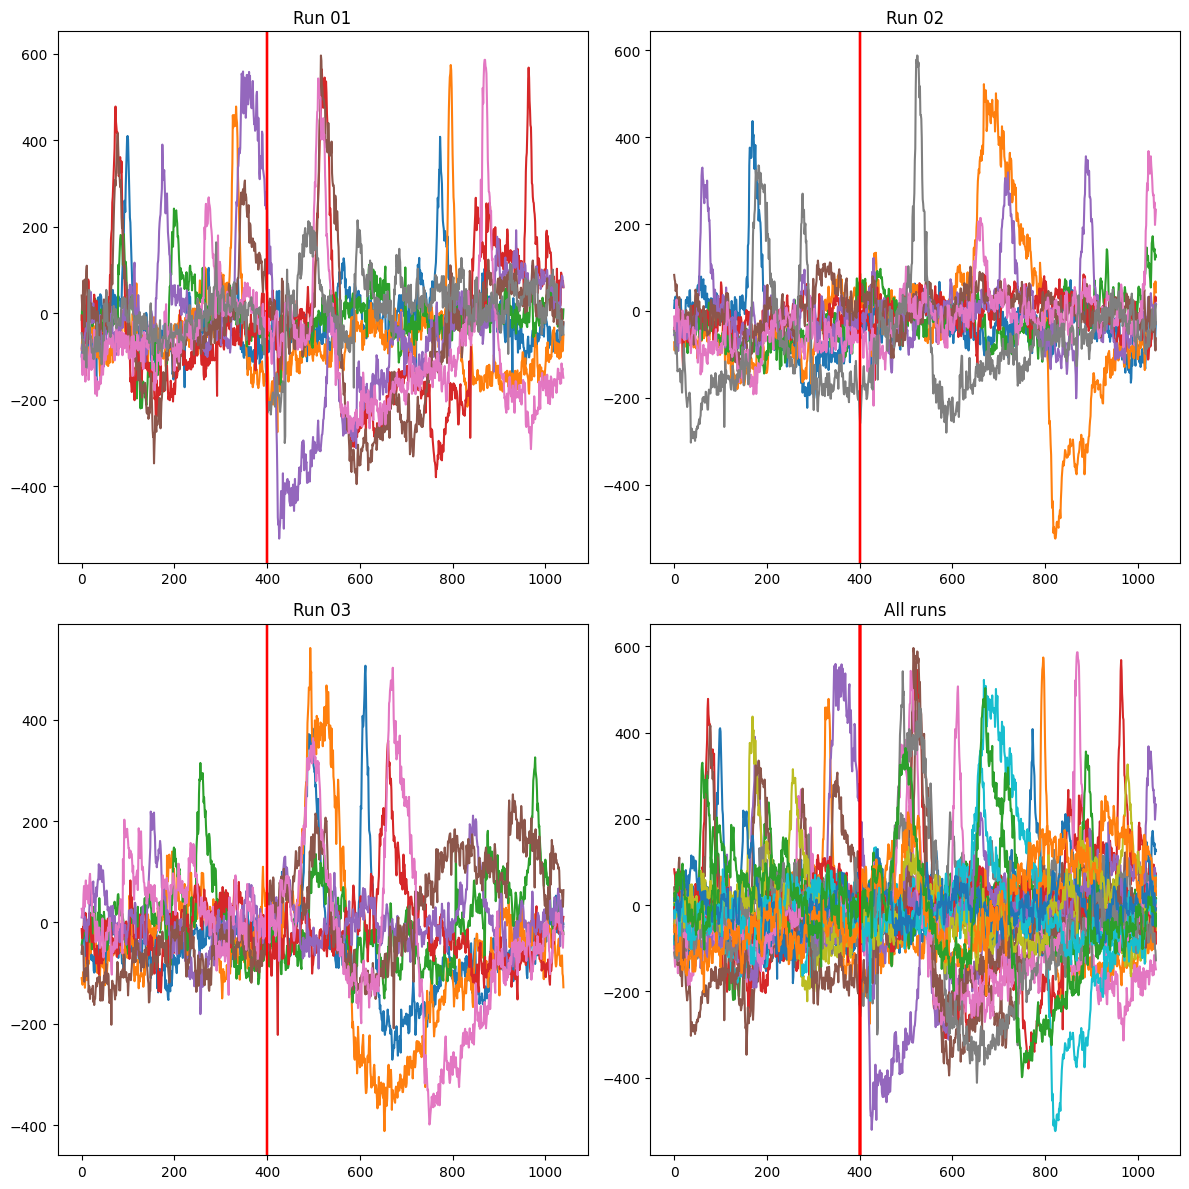

In [88]:
fs = 160.0

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i in range(len(data)):
	signals = data[i]
	if i<per_run[0]:
		run = 1
		axs[0, 0].plot(signals[21,:])
		axs[0, 0].axvline(x=400, color = 'r')
	elif per_run[0]<= i <(per_run[1]+per_run[0]):
		axs[0, 1].plot(signals[21,:])
		axs[0, 1].axvline(x=400, color = 'r')
	else:
		axs[1, 0].plot(signals[21,:])
		axs[1, 0].axvline(x=400, color = 'r')
	axs[1, 1].plot(signals[21,:])
	axs[1, 1].axvline(x=400, color = 'r')
	

	
#axs[(ch-1)//4, (ch-1)%4].set_ylabel('PDS (Normalized)')
#axs[(ch-1)//4, (ch-1)%4].set_xlabel('Frequency [Hz]')

axs[0, 0].set_title("Run 01")
axs[0, 1].set_title("Run 02")
axs[1, 0].set_title("Run 03")
axs[1, 1].set_title("All runs")

fig.tight_layout()
#fig.savefig('S055R03_spectrogram.png', dpi=300)

plt.show()

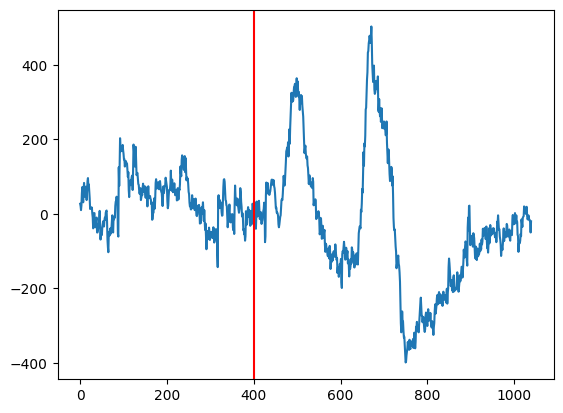

In [87]:
plt.plot(signals[21,:])
plt.axvline(x=400, color = 'r')

In [66]:
# Notch Filter, 60 Hz

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

In [89]:
# Filter Notch Design
fs = 160  # Sample frequency (Hz)
f0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor, tipical 1-100, higher values sharps the reject band 

# IIR notch filter using signal.iirnotch
b, a = signal.iirnotch(f0, Q, fs)

# Compute magnitude response of the designed filter
freq, h = signal.freqz(b, a, fs=fs)

In [90]:
# Apply notch filter to signal using signal.filtfilt
signal_filtered = signal.filtfilt(b, a, signals[0])

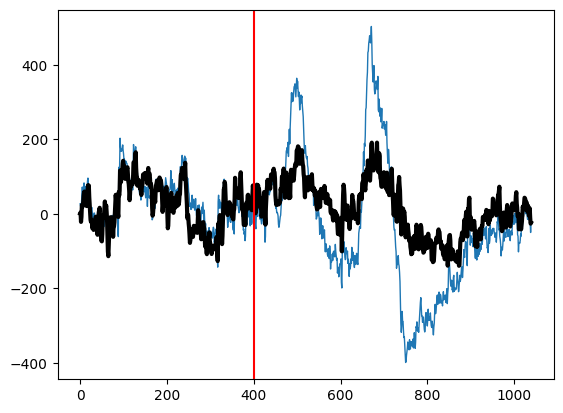

In [93]:
plt.plot(signals[21,:], linewidth=1.0)
plt.plot(signal_filtered, color='k', linewidth=3.0)
plt.axvline(x=400, color = 'r')